### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

### testing sigma coordinates stuff

Text(0.5, 1.0, 'moc, sigma coordinates, neutral density')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


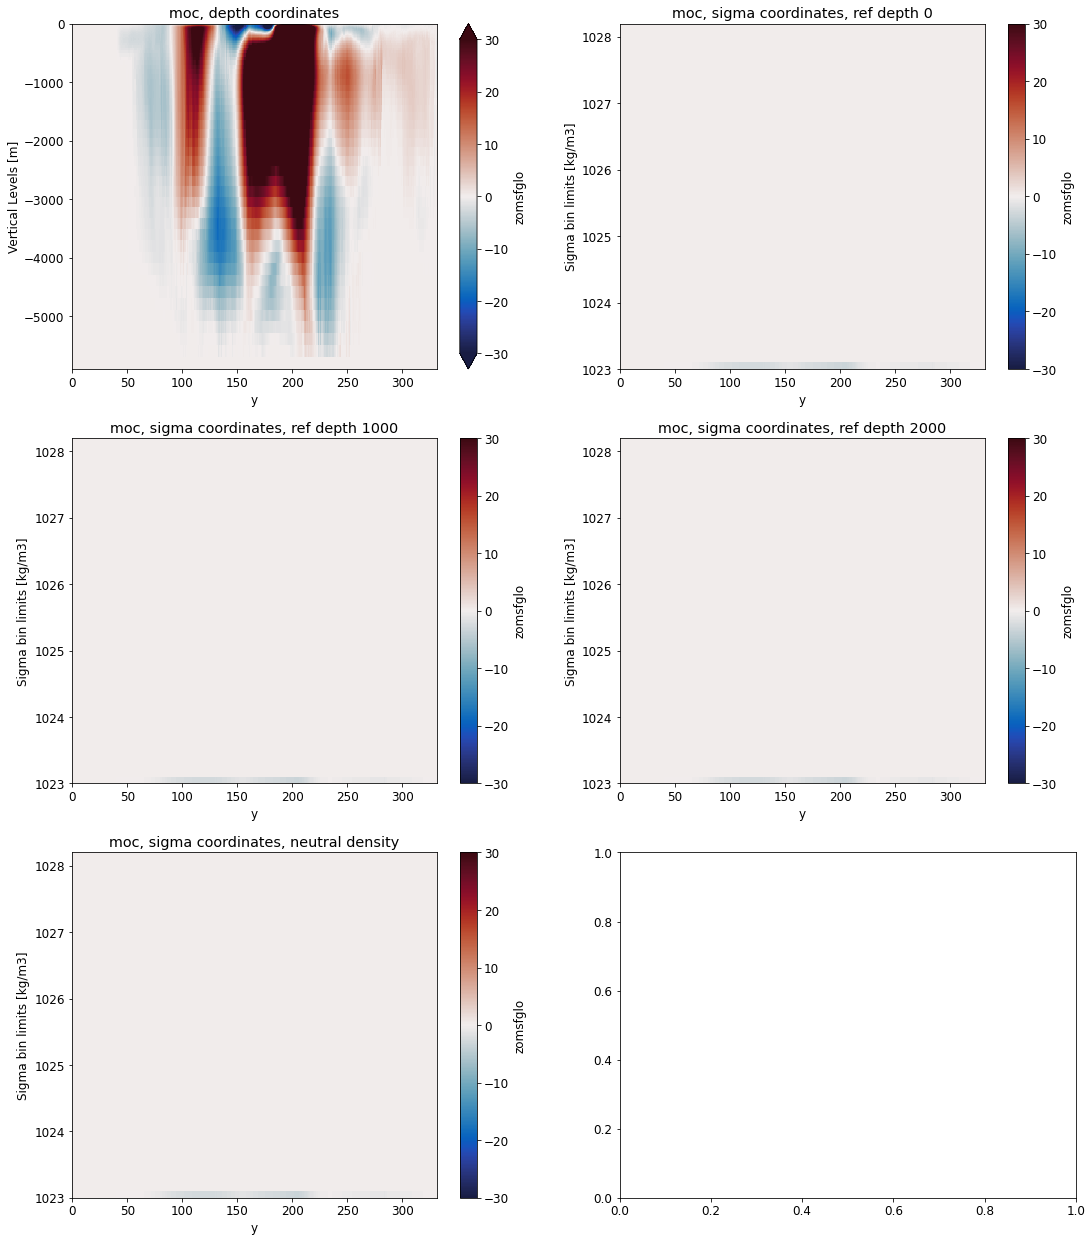

In [4]:
tdir = '/gpfs/home/mep22dku/scratch/CDFTOOLS/bin/'
moc = xr.open_dataset(f'{tdir}nemo_bc370o_1m_19700101-19700201-moc.nc')

mocsig_0 = xr.open_dataset(f'{tdir}/nemo_bc370o_1m_19700101-19700201-mocsig-0.nc')
mocsig_1000 = xr.open_dataset(f'{tdir}/nemo_bc370o_1m_19700101-19700201-mocsig-1000.nc')
mocsig_2000 = xr.open_dataset(f'{tdir}/nemo_bc370o_1m_19700101-19700201-mocsig-2000.nc')
mocsig_ntr = xr.open_dataset(f'{tdir}/nemo_bc370o_1m_19700101-19700201-mocsig-ntr.nc')

fact = 0.9
fig, axs = plt.subplots(3,2, figsize=(20*fact, 24*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

xr.plot.pcolormesh(moc.zomsfglo.mean(dim = 'time_counter').isel(x=0), \
                   ax = axs[0], vmin = -30, vmax = 30, cmap = cm.balance)
axs[0].set_title('moc, depth coordinates')

xr.plot.pcolormesh(mocsig_0.zomsfglo.mean(dim = 'time_counter').isel(x=0), \
                   ax = axs[1], vmin = -30, vmax = 30, cmap = cm.balance)
axs[1].set_title('moc, sigma coordinates, ref depth 0')

xr.plot.pcolormesh(mocsig_1000.zomsfglo.mean(dim = 'time_counter').isel(x=0), \
                   ax = axs[2], vmin = -30, vmax = 30, cmap = cm.balance)
axs[2].set_title('moc, sigma coordinates, ref depth 1000')

xr.plot.pcolormesh(mocsig_2000.zomsfglo.mean(dim = 'time_counter').isel(x=0), \
                   ax = axs[3], vmin = -30, vmax = 30, cmap = cm.balance)
axs[3].set_title('moc, sigma coordinates, ref depth 2000')

xr.plot.pcolormesh(mocsig_ntr.zomsfglo.mean(dim = 'time_counter').isel(x=0), \
                   ax = axs[4], vmin = -30, vmax = 30, cmap = cm.balance)
axs[4].set_title('moc, sigma coordinates, neutral density')

### 

<xarray.Dataset>
Dimensions:       (depthw: 75, time_counter: 1, x: 1, y: 332)
Coordinates:
  * depthw        (depthw) float32 -0.0 -1.0239066 ... -5596.249 -5800.0
  * time_counter  (time_counter) float64 0.0
Dimensions without coordinates: x, y
Data variables:
    nav_lon       (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    nav_lat       (y, x) float32 -84.06662 -83.946205 ... 89.83964 89.562836
    zomsfglo      (time_counter, depthw, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A
    history:           Partial step computation